### Importing Data

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")

df_e = pd.read_csv("output/e_walk_100.csv", dtype={"e": object})
df_e.head()

,Unnamed: 0,0_freq,1_freq,2_freq,3_freq,4_freq,5_freq,6_freq,7_freq,8_freq,9_freq,area_total,area_delta,e
0,0,0,0,0,0,0,0,0,1,0,0,0.00,0.00,2.70000
1,1,0,1,0,0,0,0,0,1,0,0,0.00,0.00,2.71000
2,2,0,1,0,0,0,0,0,1,1,0,0.07,0.07,2.71800
3,3,0,1,1,0,0,0,0,1,1,0,0.14,0.07,2.71820
4,4,0,1,1,0,0,0,0,1,2,0,0.21,0.07,2.71828


In [22]:
df_e = df_e.drop(df_e.columns[0], axis=1)
df_e["precision"] = df_e.index + 1
df_e.head()

,0_freq,1_freq,2_freq,3_freq,4_freq,5_freq,6_freq,7_freq,8_freq,9_freq,area_total,area_delta,e,precision
0,0,0,0,0,0,0,0,1,0,0,0.00,0.00,2.70000,1
1,0,1,0,0,0,0,0,1,0,0,0.00,0.00,2.71000,2
2,0,1,0,0,0,0,0,1,1,0,0.07,0.07,2.71800,3
3,0,1,1,0,0,0,0,1,1,0,0.14,0.07,2.71820,4
4,0,1,1,0,0,0,0,1,2,0,0.21,0.07,2.71828,5


#### Finding Updates
Finding the digit we get for a given precision can be helpful for analysing the distribution of digits across the data

In [23]:
digits = [7]
for i in range(df_e.shape[0]-1):
    diff = df_e.iloc[i+1, :10] - df_e.iloc[i, :10]
    digit = list(diff[diff>0].index)[0].strip("_freq")
    digits.append(int(digit))
df_e["digit"] = digits

In [24]:
df_e.head()

,0_freq,1_freq,2_freq,3_freq,4_freq,5_freq,6_freq,7_freq,8_freq,9_freq,area_total,area_delta,e,precision,digit
0,0,0,0,0,0,0,0,1,0,0,0.00,0.00,2.70000,1,7
1,0,1,0,0,0,0,0,1,0,0,0.00,0.00,2.71000,2,1
2,0,1,0,0,0,0,0,1,1,0,0.07,0.07,2.71800,3,8
3,0,1,1,0,0,0,0,1,1,0,0.14,0.07,2.71820,4,2
4,0,1,1,0,0,0,0,1,2,0,0.21,0.07,2.71828,5,8


### Exploring the Distribution

In [25]:
df_e["digit"].value_counts().sort_index()

digit
0     5
1     6
2    12
3     8
4    11
5    13
6    12
7    16
8     7
9    10
Name: count, dtype: int64

Text(0.5, 0.98, 'Distribution of Digits')

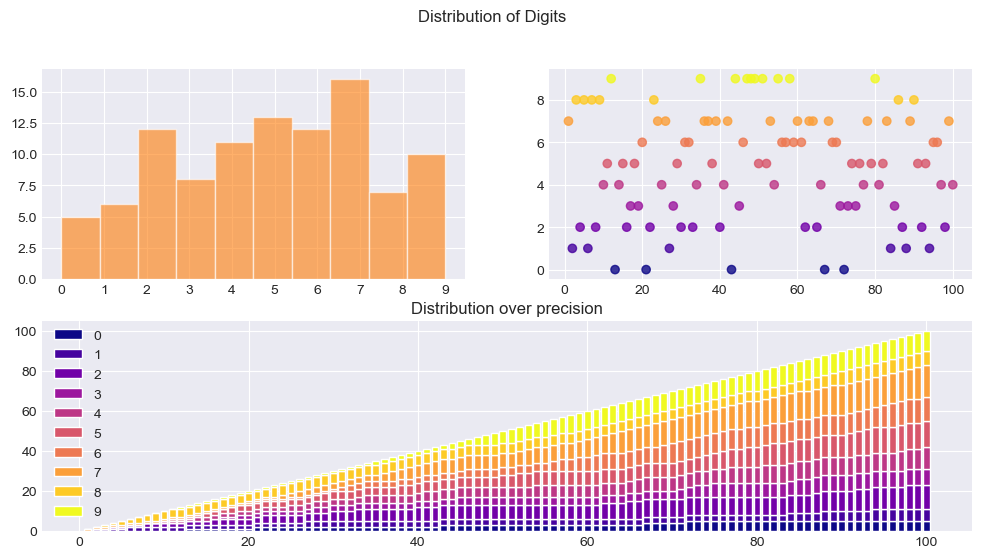

In [38]:
fig = plt.figure(figsize=(12, 6))
hist_ax = fig.add_subplot(221)
scatter_ax = fig.add_subplot(222)
bar_ax = fig.add_subplot(212)

hist_ax.hist(df_e["digit"], alpha=0.614, color="tab:orange")
hist_ax.set_xticks(np.arange(10))
scatter_ax.scatter(df_e["precision"], df_e["digit"], c=df_e["digit"], alpha=0.8, cmap="plasma");

freq_columns = list(df_e.iloc[:, :10].columns)

color_x = np.linspace(0, 1, 10)
colors = plt.cm.plasma(color_x)

for i in range(len(freq_columns)):
    bottom_values = np.sum(df_e[freq_columns[:i]], axis=1) if i > 0 else 0
    bar_ax.bar(df_e["precision"], df_e[freq_columns[i]], bottom=bottom_values, label=f"{i}", color=colors[i])

bar_ax.legend()
bar_ax.set_title("Distribution over precision")
fig.suptitle("Distribution of Digits")

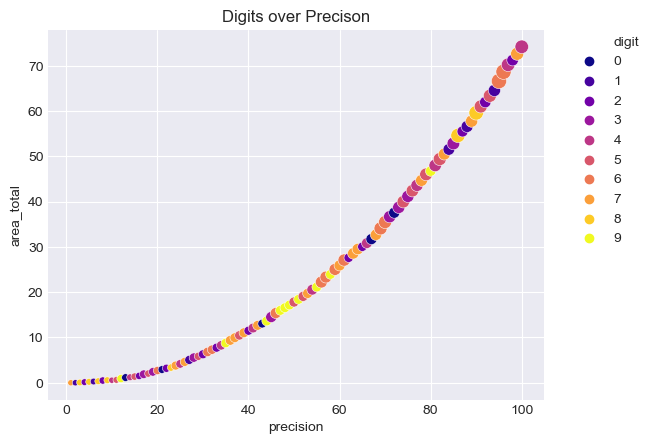

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
scatter = sns.scatterplot(data=df_e, x="precision", y="area_total", hue="digit", legend="full", palette="plasma", size="area_delta", sizes=(20, 120))

# Only get the legend for digits
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[:11], labels=labels[:11], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
scatter.set_title("Digits over Precison");

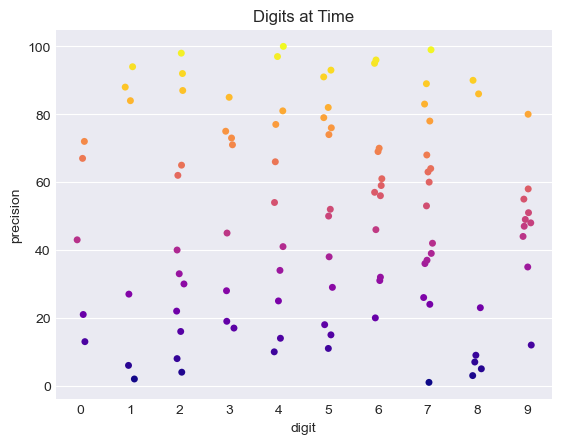

In [ ]:
sns.stripplot(data=df_e, x="digit", y="precision", hue="precision", palette="plasma", legend=False);
plt.title("Digits at Time");

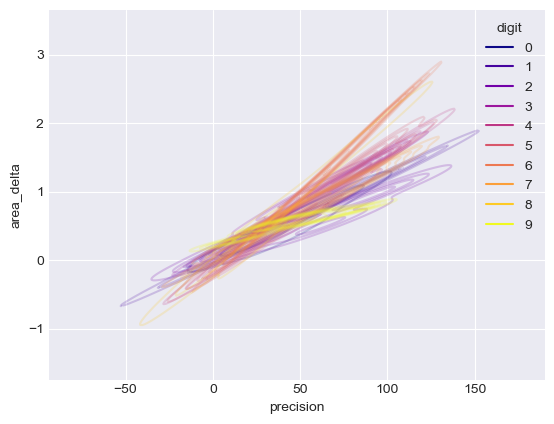

In [ ]:
sns.kdeplot(data=df_e, x="precision", y="area_delta", hue="digit", alpha=0.2, palette="plasma");

We see that there is a difference compared to the kde plot of pi walk for the 100 digits.

### Area deltas

### Scaling by Precision
We see that the area_delta (the new digit's contribution to the overall area) increases over time, but in order to compare them to each other we might want to scale the area delta by the precision as we know that the significance of a digit will decrease over time.

Text(0.5, 0.98, 'Area Delta over Precision')

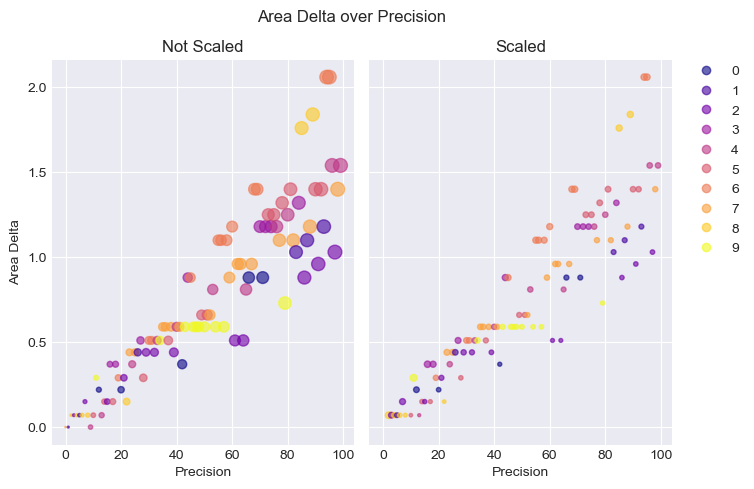

In [ ]:
fig = plt.figure(figsize=(8,5))
gs = fig.add_gridspec(1, 2, hspace=0.2, wspace=0.05)
axes = gs.subplots(sharey='row')
ax1, ax2 = axes

ax1.scatter(df_e.index, df_e["area_delta"], s=df_e["precision"], alpha=0.614, c=df_e["digit"], cmap="plasma");
plot2 = ax2.scatter(df_e.index, df_e["area_delta"], s=df_e["area_delta"]/df_e["precision"]*1000, alpha=0.614, c=df_e["digit"], cmap="plasma")

legend_labels = sorted(df_e["digit"].unique())
legend_handles = plot2.legend_elements()[0]
ax2.legend(handles= legend_handles, labels=legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

ax1.set_title("Not Scaled")
ax1.set_xlabel("Precision")
ax1.set_ylabel("Area Delta")

ax2.set_title("Scaled")
ax2.set_xlabel("Precision")

fig.suptitle("Area Delta over Precision")

# Add legend
# Add Title for both
# Add axis labels

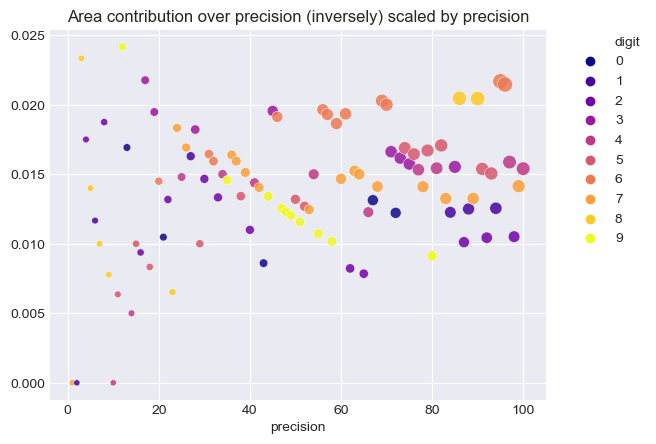

In [28]:
scatter = sns.scatterplot(data=df_e, x="precision", y=df_e["area_delta"]/df_e["precision"], hue="digit", legend="full", palette="plasma", size="area_delta", sizes=(20, 120), alpha=0.85)
# Only get the legend for colors
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[:11], labels=labels[:11], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title("Area contribution over precision (inversely) scaled by precision");

### Digit Frequencies over Time (precision)

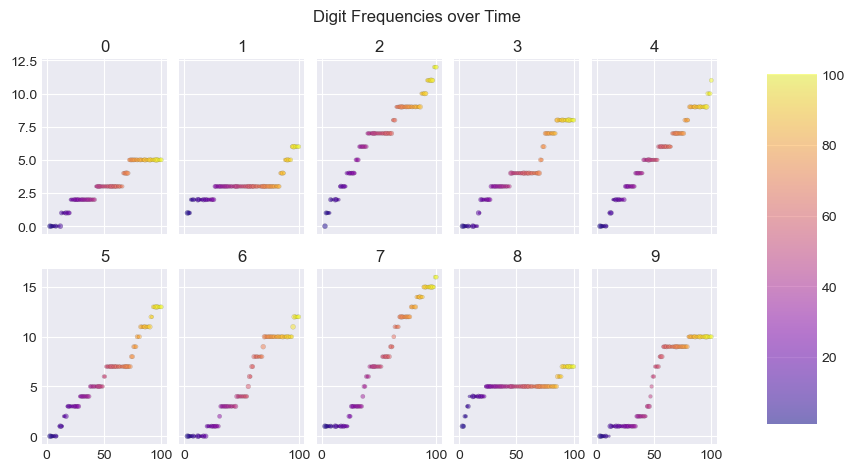

In [29]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(2, 5, hspace=0.2, wspace=0.1)
axs = gs.subplots(sharex='col', sharey='row')
axes = axs.ravel()
for i in range(len(axes)):
    scatter = axes[i].scatter(df_e["precision"], df_e[str(i)+"_freq"], c=df_e["precision"], cmap="plasma", s=df_e["area_delta"]/df_e["precision"]*600, alpha=0.5, edgecolors="black", linewidth=0.1)
    axes[i].set_title(str(i))

fig.suptitle("Digit Frequencies over Time");
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(scatter, cax=cbar_ax);
# Add Colorbar

### Update Periods (Wait Streaks)
We can look for the time it takes for a digit frequency to get updated e.g. how much time does it take on average to get the next 0?

In [34]:
streaks = []
counters = np.array([0 for i in range(10)])

latest = 10
for index, row in df_e.iterrows():
    counters += 1
    counters[int(row["digit"])] = 0
    streaks.append(counters.copy())

streaks_df = pd.DataFrame(streaks)
streaks_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,1,1,0,1,1
1,2,0,2,2,2,2,2,1,2,2
2,3,1,3,3,3,3,3,2,0,3
3,4,2,0,4,4,4,4,3,1,4
4,5,3,1,5,5,5,5,4,0,5


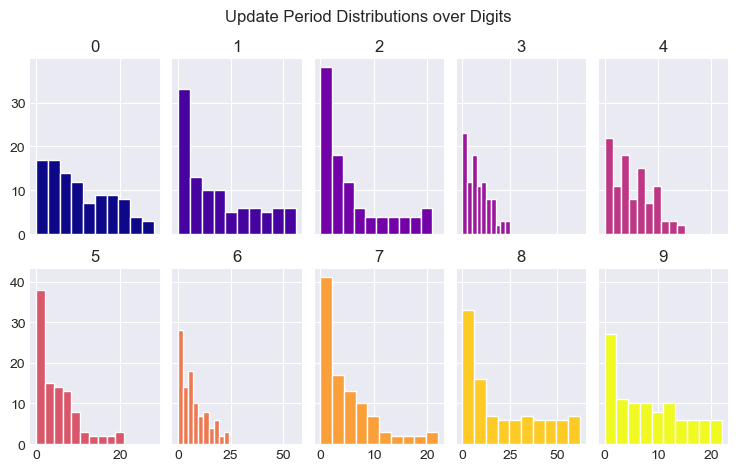

In [35]:
fig = plt.figure(figsize=(9,5))
gs = fig.add_gridspec(2, 5, hspace=0.2, wspace=0.1)
axs = gs.subplots(sharex='col', sharey='row')
axes = axs.ravel()

color_x = np.linspace(0, 1, 10)
colors = plt.cm.plasma(color_x)

for i in range(len(axes)):
    axes[i].hist(streaks_df[i], color=colors[i])
    axes[i].set_title(i)

fig.suptitle("Update Period Distributions over Digits");

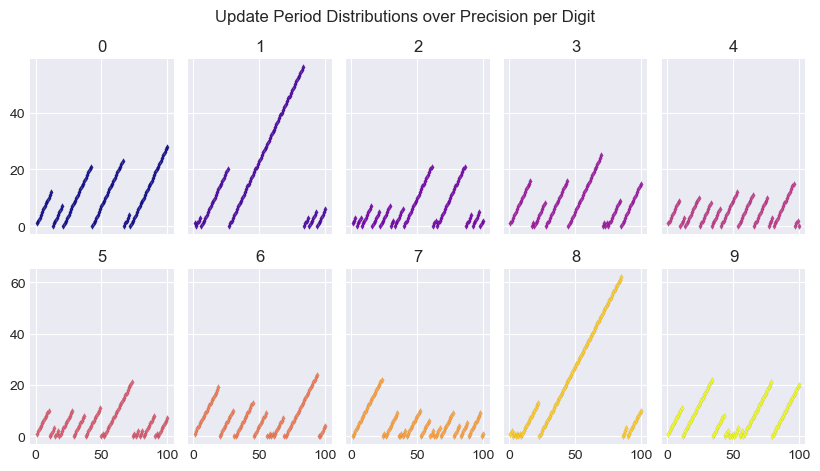

In [36]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(2, 5, hspace=0.2, wspace=0.1)
axs = gs.subplots(sharex='col', sharey='row')
axes = axs.ravel()

color_x = np.linspace(0, 1, 10)
colors = plt.cm.plasma(color_x)

for i in range(len(axes)):
    axes[i].scatter(streaks_df.index + 1, streaks_df[i], color=colors[i], s=10, marker="d", edgecolors="black", lw=0.04, alpha=0.9)
    axes[i].set_title(i)

fig.suptitle("Update Period Distributions over Precision per Digit");

### Even, Odd, Prime Frequencies

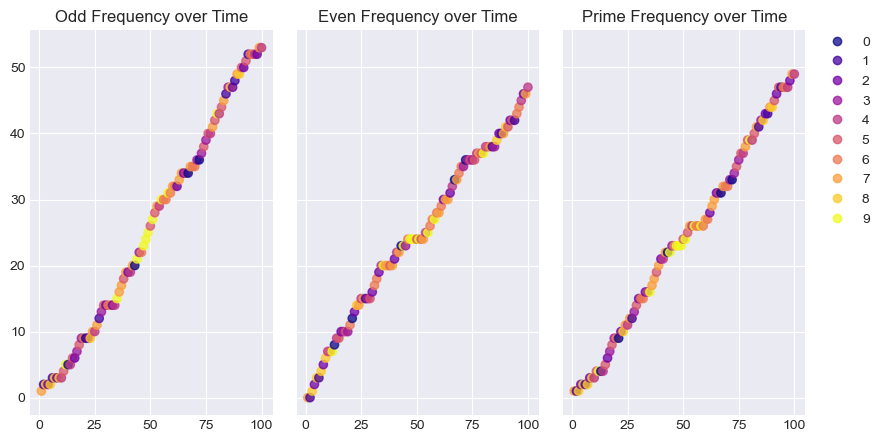

In [37]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1, 3, hspace=0.2, wspace=0.1)
axes = gs.subplots(sharey='row')

odd_frequencies = df_e["1_freq"] + df_e["3_freq"] + df_e["5_freq"] + df_e["7_freq"] + df_e["9_freq"]
even_frequencies = df_e["0_freq"] + df_e["2_freq"] + df_e["4_freq"] + df_e["6_freq"] + df_e["8_freq"]
prime_frequencies = df_e["2_freq"] + df_e["3_freq"] + df_e["5_freq"] + df_e["7_freq"]

axes[0].scatter(df_e["precision"], odd_frequencies, c=df_e["digit"], cmap="plasma", alpha=0.75)
axes[1].scatter(df_e["precision"], even_frequencies, c=df_e["digit"], cmap="plasma", alpha=0.75)
prime_plot = axes[2].scatter(df_e["precision"], prime_frequencies, c=df_e["digit"], cmap="plasma", alpha=0.75)

axes[0].set_title("Odd Frequency over Time")
axes[1].set_title("Even Frequency over Time")
axes[2].set_title("Prime Frequency over Time")

legend_labels = sorted(df_e["digit"].unique())
legend_handles = prime_plot.legend_elements()[0]
axes[2].legend(handles= legend_handles, labels=legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);